<a href="https://colab.research.google.com/github/jwang44/crispy-fiesta/blob/main/runtime_accu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


## Load the data and get basic features

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('./train.csv',engine='python')
test = pd.read_csv('./test.csv',engine='python')

In [4]:
X_train = train.body  # train texts
y_train = train.subreddit # train subreddits
X_test = test.body  # test texts

In [5]:
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [6]:
# transform target labels to values
le = LabelEncoder()
y_train_num = le.fit_transform(y_train.values) # convert category from string to numerical (!!!!! update the variables in kcross fold)

# vectorize word count
vectorizer = CountVectorizer()
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)

normalizer_train = Normalizer()
vectors_train= normalizer_train.transform(vectors_train)
vectors_test= normalizer_train.transform(vectors_test)

# print(vectorizer.get_feature_names())
print(vectors_train.shape)
print(vectors_test.shape)

(1999, 15365)
(1378, 15365)


In [7]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
# put it all together: remove stop words and punctuation, tfidf, lemmatization, normalization
stop_words = text.ENGLISH_STOP_WORDS

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

tf_idf_transformer = TfidfTransformer()
vectorizer = CountVectorizer(stop_words = stop_words, tokenizer = New_LemmaTokenizer(), ngram_range=(1, 2)) #unigram+bigram:ngram_range=(1, 2), only bigram:ngram_range=(2, 2)
vectors_train_stop_tfidf_Lemma = vectorizer.fit_transform(X_train)
vectors_train_stop_tfidf_Lemma = tf_idf_transformer.fit_transform(vectors_train_stop_tfidf_Lemma)
vectors_test_stop_tfidf_Lemma = vectorizer.transform(X_test)
vectors_test_stop_tfidf_Lemma = tf_idf_transformer.transform(vectors_test_stop_tfidf_Lemma)
vectors_train_stop_tfidf_Lemma = normalizer_train.transform(vectors_train_stop_tfidf_Lemma)
vectors_test_stop_tfidf_Lemma = normalizer_train.transform(vectors_test_stop_tfidf_Lemma)

#print(vectorizer.get_feature_names())
print(vectors_train_stop_tfidf_Lemma.shape)
print(vectors_test_stop_tfidf_Lemma.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1999, 70414)
(1378, 70414)


In [9]:
# remove stopwords and punctuation, tfidf, stemming, normalization
stop_words = text.ENGLISH_STOP_WORDS

class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

tf_idf_transformer = TfidfTransformer()
vectorizer = CountVectorizer(stop_words = stop_words, tokenizer=StemTokenizer(),ngram_range=(1, 2)) #unigram+bigram:ngram_range=(1, 2), only bigram:ngram_range=(2, 2)
vectors_train_stop_tfidf_stem = vectorizer.fit_transform(X_train)
vectors_train_stop_tfidf_stem = tf_idf_transformer.fit_transform(vectors_train_stop_tfidf_stem)
vectors_test_stop_tfidf_stem = vectorizer.transform(X_test)
vectors_test_stop_tfidf_stem = tf_idf_transformer.transform(vectors_test_stop_tfidf_stem)
vectors_train_stop_tfidf_stem = normalizer_train.transform(vectors_train_stop_tfidf_stem)
vectors_test_stop_tfidf_stem = normalizer_train.transform(vectors_test_stop_tfidf_stem)
print(vectors_train_stop_tfidf_stem.shape)
print(vectors_test_stop_tfidf_stem.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

(1999, 73597)
(1378, 73597)


## Measure runtime and accuracy for different feature numbers and different feature selections

In [10]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, mutual_info_classif, f_classif, SelectFpr, SelectFwe, SelectFdr, RFE, RFECV, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import time

###feature selection function

In [92]:
select_chi2_1 = SelectPercentile(chi2, percentile=0.015)
ft_chi2_1 = select_chi2_1.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_chi2_2 = SelectPercentile(chi2, percentile=0.06)
ft_chi2_2 = select_chi2_2.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_chi2_3 = SelectPercentile(chi2, percentile=0.24)
ft_chi2_3 = select_chi2_3.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_chi2_4 = SelectPercentile(chi2, percentile=1)
ft_chi2_4 = select_chi2_4.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_chi2_5 = SelectPercentile(chi2, percentile=4)
ft_chi2_5 = select_chi2_5.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_chi2_6 = SelectPercentile(chi2, percentile=16)
ft_chi2_6 = select_chi2_6.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_chi2_7 = SelectPercentile(chi2, percentile=64)
ft_chi2_7 = select_chi2_7.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)

In [99]:
select_mutual_1 = SelectPercentile(mutual_info_classif, percentile=0.015)
ft_mutual_1 = select_mutual_1.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_mutual_2 = SelectPercentile(mutual_info_classif, percentile=0.06)
ft_mutual_2 = select_mutual_2.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_mutual_3 = SelectPercentile(mutual_info_classif, percentile=0.24)
ft_mutual_3 = select_mutual_3.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_mutual_4 = SelectPercentile(mutual_info_classif, percentile=1)
ft_mutual_4 = select_mutual_4.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_mutual_5 = SelectPercentile(mutual_info_classif, percentile=4)
ft_mutual_5 = select_mutual_5.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_mutual_6 = SelectPercentile(mutual_info_classif, percentile=16)
ft_mutual_6 = select_mutual_6.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_mutual_7 = SelectPercentile(mutual_info_classif, percentile=64)
ft_mutual_7 = select_mutual_7.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)

In [95]:
select_f_1 = SelectPercentile(mutual_info_classif, percentile=0.015)
ft_f_1 = select_f_1.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_f_2 = SelectPercentile(mutual_info_classif, percentile=0.06)
ft_f_2 = select_f_2.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_f_3 = SelectPercentile(mutual_info_classif, percentile=0.24)
ft_f_3 = select_f_3.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_f_4 = SelectPercentile(mutual_info_classif, percentile=1)
ft_f_4 = select_f_4.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_f_5 = SelectPercentile(mutual_info_classif, percentile=4)
ft_f_5 = select_f_5.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_f_6 = SelectPercentile(mutual_info_classif, percentile=16)
ft_f_6 = select_f_6.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
select_f_7 = SelectPercentile(mutual_info_classif, percentile=64)
ft_f_7 = select_f_7.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)

In [103]:
def feature_select(selector,per):
  if selector=='chi2':
    if per == 0.015:
      return ft_chi2_1
    elif per == 0.06:
      return ft_chi2_2
    elif per == 0.24:
      return ft_chi2_3
    elif per == 1:
      return ft_chi2_4
    elif per == 4:
      return ft_chi2_5
    elif per == 16:
      return ft_chi2_6
    elif per == 64:
      return ft_chi2_7     
  elif selector=='mutual_info':
    if per == 0.015:
      return ft_mutual_1
    elif per == 0.06:
      return ft_mutual_2
    elif per == 0.24:
      return ft_mutual_3
    elif per == 1:
      return ft_mutual_4
    elif per == 4:
      return ft_mutual_5
    elif per == 16:
      return ft_mutual_6
    elif per == 64:
      return ft_mutual_7  
  elif selector=='f':
    if per == 0.015:
      return ft_f_1
    elif per == 0.06:
      return ft_f_2
    elif per == 0.24:
      return ft_f_3
    elif per == 1:
      return ft_f_4
    elif per == 4:
      return ft_f_5
    elif per == 16:
      return ft_f_6
    elif per == 64:
      return ft_f_7  

###runtime accu

In [97]:
def runtime_accu(selector, model, per):
  # select = SelectKBest(chi2, k=k)
  
  vectors_train_Lemma = feature_select(selector,per)
  print(vectors_train_Lemma.shape)
  t1 = time.time()
  accuracy = cross_val_score(model, vectors_train_Lemma, y_train_num, cv=10).mean()
  runtime = time.time()-t1
  print("accuracy: ", accuracy)
  print("runtime: ", runtime, '\n')
  return accuracy, runtime

In [78]:
per_range = [0.015, 0.06, 0.24, 1, 4, 16, 64]

### Chi2

In [145]:
selector = 'chi2'

In [146]:
model = LinearSVC(C=1)
acc_linearsvc = []
t_linearsvc = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  acc_linearsvc.append(accuracy)
  t_linearsvc.append(runtime)

(1999, 11)
accuracy:  0.689354271356784
runtime:  0.16544103622436523 

(1999, 42)
accuracy:  0.7594045226130653
runtime:  0.1812300682067871 

(1999, 169)
accuracy:  0.8579472361809044
runtime:  0.20434331893920898 

(1999, 705)
accuracy:  0.9119572864321608
runtime:  0.24789834022521973 

(1999, 2817)
accuracy:  0.9404773869346735
runtime:  0.31222033500671387 

(1999, 11266)
accuracy:  0.9469723618090452
runtime:  0.4239063262939453 

(1999, 45064)
accuracy:  0.9419748743718592
runtime:  0.7392127513885498 



In [147]:
model = SVC(C=1)
acc_svc = []
t_svc = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  acc_svc.append(accuracy)
  t_svc.append(runtime)

(1999, 11)
accuracy:  0.6848492462311558
runtime:  0.7908039093017578 

(1999, 42)
accuracy:  0.7578969849246231
runtime:  0.9890344142913818 

(1999, 169)
accuracy:  0.8509346733668341
runtime:  1.321225643157959 

(1999, 705)
accuracy:  0.8959447236180905
runtime:  3.3054208755493164 

(1999, 2817)
accuracy:  0.929467336683417
runtime:  10.067138433456421 

(1999, 11266)
accuracy:  0.8959472361809044
runtime:  14.995628595352173 

(1999, 45064)
accuracy:  0.9204748743718593
runtime:  21.900299787521362 



In [148]:
model = MultinomialNB(alpha=1e-10)
acc_MNB = []
t_MNB = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  acc_MNB.append(accuracy)
  t_MNB.append(runtime)

(1999, 11)
accuracy:  0.5967914572864321
runtime:  0.02365732192993164 

(1999, 42)
accuracy:  0.7013643216080403
runtime:  0.018560171127319336 

(1999, 169)
accuracy:  0.8084170854271356
runtime:  0.021249055862426758 

(1999, 705)
accuracy:  0.8954597989949749
runtime:  0.02305150032043457 

(1999, 2817)
accuracy:  0.9479824120603016
runtime:  0.03034186363220215 

(1999, 11266)
accuracy:  0.9589849246231156
runtime:  0.047742366790771484 

(1999, 45064)
accuracy:  0.9279748743718592
runtime:  0.13162016868591309 



In [149]:
model = LogisticRegression()
acc_LR = []
t_LR = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  acc_LR.append(accuracy)
  t_LR.append(runtime)

(1999, 11)
accuracy:  0.6848517587939698
runtime:  0.4727652072906494 

(1999, 42)
accuracy:  0.7508944723618091
runtime:  0.7359647750854492 

(1999, 169)
accuracy:  0.8499422110552762
runtime:  0.99277663230896 

(1999, 705)
accuracy:  0.9049547738693468
runtime:  1.3592965602874756 

(1999, 2817)
accuracy:  0.9304698492462311
runtime:  4.165464162826538 

(1999, 11266)
accuracy:  0.9369723618090452
runtime:  11.151235818862915 

(1999, 45064)
accuracy:  0.9334748743718595
runtime:  33.1479971408844 



### Mutual info

In [150]:
selector = 'mutual_info'

In [151]:
model = LinearSVC(C=1)
m_acc_linearsvc = []
m_t_linearsvc = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  m_acc_linearsvc.append(accuracy)
  m_t_linearsvc.append(runtime)

(1999, 11)
accuracy:  0.48426381909547744
runtime:  0.2122032642364502 

(1999, 43)
accuracy:  0.7133768844221106
runtime:  0.20849394798278809 

(1999, 169)
accuracy:  0.8244221105527638
runtime:  0.23018383979797363 

(1999, 705)
accuracy:  0.8824447236180906
runtime:  0.2861955165863037 

(1999, 2816)
accuracy:  0.9289648241206031
runtime:  0.37527942657470703 

(1999, 11266)
accuracy:  0.9354648241206028
runtime:  0.4809145927429199 

(1999, 45064)
accuracy:  0.937467336683417
runtime:  0.7279319763183594 



In [152]:
model = SVC(C=1)
m_acc_svc = []
m_t_svc = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  m_acc_svc.append(accuracy)
  m_t_svc.append(runtime)

(1999, 11)
accuracy:  0.48827638190954775
runtime:  1.9841423034667969 

(1999, 43)
accuracy:  0.6988668341708544
runtime:  2.4201745986938477 

(1999, 169)
accuracy:  0.8084120603015075
runtime:  3.584333658218384 

(1999, 705)
accuracy:  0.8674346733668342
runtime:  6.766091823577881 

(1999, 2816)
accuracy:  0.922964824120603
runtime:  14.433770656585693 

(1999, 11266)
accuracy:  0.9214597989949749
runtime:  18.673514127731323 

(1999, 45064)
accuracy:  0.9484798994974876
runtime:  22.051501035690308 



In [153]:
model = MultinomialNB(alpha=1e-10)
m_acc_MNB = []
m_t_MNB = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  m_acc_MNB.append(accuracy)
  m_t_MNB.append(runtime)

(1999, 11)
accuracy:  0.4632462311557789
runtime:  0.023824214935302734 

(1999, 43)
accuracy:  0.669856783919598
runtime:  0.019484758377075195 

(1999, 169)
accuracy:  0.7443869346733669
runtime:  0.020663976669311523 

(1999, 705)
accuracy:  0.7949120603015075
runtime:  0.024098873138427734 

(1999, 2816)
accuracy:  0.8734371859296483
runtime:  0.03317713737487793 

(1999, 11266)
accuracy:  0.8999547738693467
runtime:  0.053458452224731445 

(1999, 45064)
accuracy:  0.8904497487437186
runtime:  0.1317596435546875 



In [154]:
model = LogisticRegression()
m_acc_LR = []
m_t_LR = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  m_acc_LR.append(accuracy)
  m_t_LR.append(runtime)

(1999, 11)
accuracy:  0.4882688442211055
runtime:  0.6378984451293945 

(1999, 43)
accuracy:  0.7068869346733667
runtime:  0.7480430603027344 

(1999, 169)
accuracy:  0.814427135678392
runtime:  1.0466268062591553 

(1999, 705)
accuracy:  0.8859497487437185
runtime:  1.5338633060455322 

(1999, 2816)
accuracy:  0.9234723618090452
runtime:  4.891570568084717 

(1999, 11266)
accuracy:  0.9314773869346734
runtime:  12.24168872833252 

(1999, 45064)
accuracy:  0.9284773869346734
runtime:  33.0831823348999 



### F score

In [155]:
selector = 'f'

In [156]:
model = LinearSVC(C=1)
f_acc_linearsvc = []
f_t_linearsvc = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  f_acc_linearsvc.append(accuracy)
  f_t_linearsvc.append(runtime)

(1999, 11)
accuracy:  0.48426381909547744
runtime:  0.24852943420410156 

(1999, 43)
accuracy:  0.7133768844221106
runtime:  0.21040916442871094 

(1999, 169)
accuracy:  0.8244221105527638
runtime:  0.22840571403503418 

(1999, 705)
accuracy:  0.8824447236180906
runtime:  0.2880406379699707 

(1999, 2816)
accuracy:  0.9289648241206031
runtime:  0.3805370330810547 

(1999, 11266)
accuracy:  0.9354648241206028
runtime:  0.480741024017334 

(1999, 45064)
accuracy:  0.937467336683417
runtime:  0.7266032695770264 



In [157]:
model = SVC(C=1)
f_acc_svc = []
f_t_svc = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  f_acc_svc.append(accuracy)
  f_t_svc.append(runtime)

(1999, 11)
accuracy:  0.48827638190954775
runtime:  1.9577252864837646 

(1999, 43)
accuracy:  0.6988668341708544
runtime:  2.4082255363464355 

(1999, 169)
accuracy:  0.8084120603015075
runtime:  3.57646107673645 

(1999, 705)
accuracy:  0.8674346733668342
runtime:  6.781553506851196 

(1999, 2816)
accuracy:  0.922964824120603
runtime:  14.449561595916748 

(1999, 11266)
accuracy:  0.9214597989949749
runtime:  18.671270608901978 

(1999, 45064)
accuracy:  0.9484798994974876
runtime:  22.027907848358154 



In [158]:
model = MultinomialNB(alpha=1e-10)
f_acc_MNB = []
f_t_MNB = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  f_acc_MNB.append(accuracy)
  f_t_MNB.append(runtime)

(1999, 11)
accuracy:  0.4632462311557789
runtime:  0.02338409423828125 

(1999, 43)
accuracy:  0.669856783919598
runtime:  0.020959854125976562 

(1999, 169)
accuracy:  0.7443869346733669
runtime:  0.02202010154724121 

(1999, 705)
accuracy:  0.7949120603015075
runtime:  0.024637699127197266 

(1999, 2816)
accuracy:  0.8734371859296483
runtime:  0.03197455406188965 

(1999, 11266)
accuracy:  0.8999547738693467
runtime:  0.05294632911682129 

(1999, 45064)
accuracy:  0.8904497487437186
runtime:  0.12800002098083496 



In [159]:
model = LogisticRegression()
f_acc_LR = []
f_t_LR = []
for per in per_range:
  accuracy, runtime = runtime_accu(selector, model, per)
  f_acc_LR.append(accuracy)
  f_t_LR.append(runtime)

(1999, 11)
accuracy:  0.4882688442211055
runtime:  0.6139829158782959 

(1999, 43)
accuracy:  0.7068869346733667
runtime:  0.7610945701599121 

(1999, 169)
accuracy:  0.814427135678392
runtime:  1.0448894500732422 

(1999, 705)
accuracy:  0.8859497487437185
runtime:  1.5261149406433105 

(1999, 2816)
accuracy:  0.9234723618090452
runtime:  5.141241550445557 

(1999, 11266)
accuracy:  0.9314773869346734
runtime:  12.426674604415894 

(1999, 45064)
accuracy:  0.9284773869346734
runtime:  32.13876175880432 



In [ ]:
model = LinearSVC(C=1)
for per in per_range:
  runtime_accu(selector, model, per)

In [ ]:
model = SVC(C=1)
for per in per_range:
  runtime_accu(selector, model, per)

In [ ]:
model = MultinomialNB(alpha=1e-10)
for per in per_range:
  runtime_accu(selector, model, per)

In [ ]:
model = LogisticRegression()
for per in per_range:
  runtime_accu(selector, model, per)

## Data Visualization

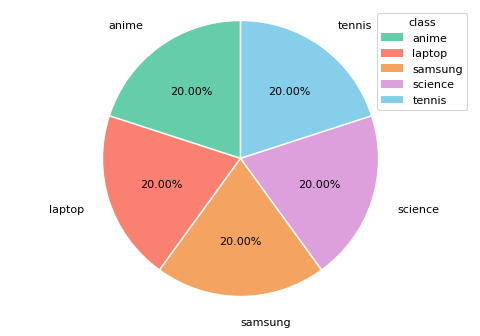

In [168]:
import matplotlib.pyplot as plt
from collections import Counter

y_labels = np.unique(y_train)

plt.figure(figsize=(7.5,5),dpi=80) # fig size
labels = list(Counter(y_labels).keys()) # label
sizes = list(Counter(y_labels).values())

colors = ['mediumaquamarine','salmon','sandybrown','plum','skyblue'] # color of each sector
explode = (0.01,0.01,0.01,0.01,0.01)
patches,text1,text2 = plt.pie(sizes,   
                      explode = explode,         
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 
# patches: pie chart，texts1: label text，texts2: pie chart text
plt.axis('equal')
plt.legend(title = 'class')
#plt.savefig('piechart.png')
plt.show()

### Chi2

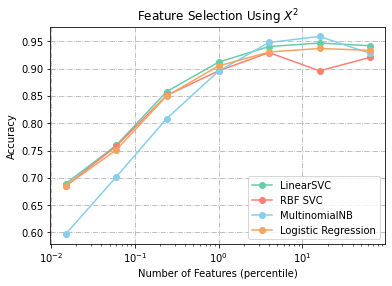

In [169]:
# plot accuracy with x2
# Data
df=pd.DataFrame({'x_values': per_range, 'y1_values': acc_linearsvc, 'y2_values': acc_svc, 'y3_values': acc_MNB, 'y4_values': acc_LR})
 
# multiple line plots
#plt.figure(figsize=(8,5))
plt.plot( 'x_values', 'y1_values', data=df, marker='.', markerfacecolor='mediumaquamarine', markersize=12, color='mediumaquamarine', label="LinearSVC")
plt.plot( 'x_values', 'y2_values', data=df, marker='.', markerfacecolor='salmon', markersize=12, color='salmon', label="RBF SVC")
plt.plot( 'x_values', 'y3_values', data=df, marker='.', markerfacecolor='skyblue', markersize=12, color='skyblue', label="MultinomialNB")
plt.plot( 'x_values', 'y4_values', data=df, marker='.', markerfacecolor='sandybrown', markersize=12, color='sandybrown', label="Logistic Regression")
plt.xscale('log')
plt.grid(linestyle='-.')
plt.legend()
plt.title('Feature Selection Using $X^2$')
plt.xlabel('Number of Features (percentile)')
plt.ylabel('Accuracy')
plt.savefig('acc_x2.png')
fig_width, fig_height = plt.gcf().get_size_inches()
plt.show()


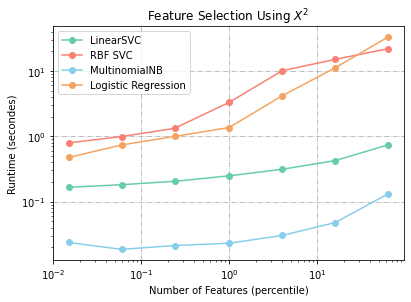

In [170]:
# plot runtime with x2
# Data
df=pd.DataFrame({'x_values': per_range, 'y1_values': t_linearsvc, 'y2_values': t_svc, 'y3_values': t_MNB, 'y4_values': t_LR})
 
# multiple line plots
plt.figure(figsize=(fig_width+0.3,fig_height+0.3))
plt.plot( 'x_values', 'y1_values', data=df, marker='.', markerfacecolor='mediumaquamarine', markersize=12, color='mediumaquamarine', label="LinearSVC")
plt.plot( 'x_values', 'y2_values', data=df, marker='.', markerfacecolor='salmon', markersize=12, color='salmon', label="RBF SVC")
plt.plot( 'x_values', 'y3_values', data=df, marker='.', markerfacecolor='skyblue', markersize=12, color='skyblue', label="MultinomialNB")
plt.plot( 'x_values', 'y4_values', data=df, marker='.', markerfacecolor='sandybrown', markersize=12, color='sandybrown', label="Logistic Regression")
plt.xscale('log')
plt.yscale('log')
plt.grid(linestyle='-.')
plt.legend()
plt.title('Feature Selection Using $X^2$')
plt.xlabel('Number of Features (percentile)')
plt.ylabel('Runtime (secondes)')
plt.savefig('t_x2.png')
plt.show()

### Mutual

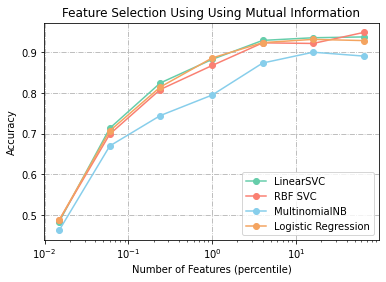

In [171]:
# plot accuracy with x2
# Data
df=pd.DataFrame({'x_values': per_range, 'y1_values': m_acc_linearsvc, 'y2_values': m_acc_svc, 'y3_values': m_acc_MNB, 'y4_values': m_acc_LR})
 
# multiple line plots
#plt.figure(figsize=(8,5))
plt.plot( 'x_values', 'y1_values', data=df, marker='.', markerfacecolor='mediumaquamarine', markersize=12, color='mediumaquamarine', label="LinearSVC")
plt.plot( 'x_values', 'y2_values', data=df, marker='.', markerfacecolor='salmon', markersize=12, color='salmon', label="RBF SVC")
plt.plot( 'x_values', 'y3_values', data=df, marker='.', markerfacecolor='skyblue', markersize=12, color='skyblue', label="MultinomialNB")
plt.plot( 'x_values', 'y4_values', data=df, marker='.', markerfacecolor='sandybrown', markersize=12, color='sandybrown', label="Logistic Regression")
plt.xscale('log')
plt.grid(linestyle='-.')
plt.legend()
plt.title('Feature Selection Using Using Mutual Information')
plt.xlabel('Number of Features (percentile)')
plt.ylabel('Accuracy')
plt.savefig('acc_mutual.png')
fig_width, fig_height = plt.gcf().get_size_inches()
plt.show()


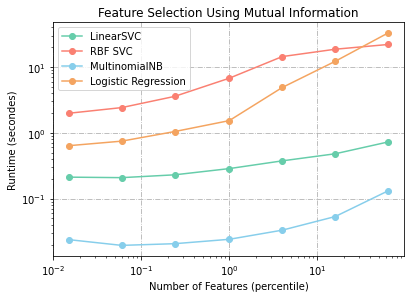

In [172]:
# plot runtime with x2
# Data
df=pd.DataFrame({'x_values': per_range, 'y1_values': m_t_linearsvc, 'y2_values': m_t_svc, 'y3_values': m_t_MNB, 'y4_values': m_t_LR})
 
# multiple line plots
plt.figure(figsize=(fig_width+0.3,fig_height+0.3))
plt.plot( 'x_values', 'y1_values', data=df, marker='.', markerfacecolor='mediumaquamarine', markersize=12, color='mediumaquamarine', label="LinearSVC")
plt.plot( 'x_values', 'y2_values', data=df, marker='.', markerfacecolor='salmon', markersize=12, color='salmon', label="RBF SVC")
plt.plot( 'x_values', 'y3_values', data=df, marker='.', markerfacecolor='skyblue', markersize=12, color='skyblue', label="MultinomialNB")
plt.plot( 'x_values', 'y4_values', data=df, marker='.', markerfacecolor='sandybrown', markersize=12, color='sandybrown', label="Logistic Regression")
plt.xscale('log')
plt.yscale('log')
plt.grid(linestyle='-.')
plt.legend()
plt.title('Feature Selection Using Mutual Information')
plt.xlabel('Number of Features (percentile)')
plt.ylabel('Runtime (secondes)')
plt.savefig('t_mutual.png')
plt.show()

### F Score

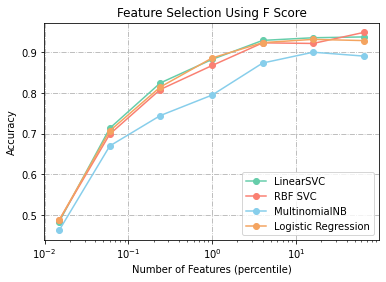

In [173]:
# plot accuracy with x2
# Data
df=pd.DataFrame({'x_values': per_range, 'y1_values': f_acc_linearsvc, 'y2_values': f_acc_svc, 'y3_values': f_acc_MNB, 'y4_values': f_acc_LR})
 
# multiple line plots
#plt.figure(figsize=(8,5))
plt.plot( 'x_values', 'y1_values', data=df, marker='.', markerfacecolor='mediumaquamarine', markersize=12, color='mediumaquamarine', label="LinearSVC")
plt.plot( 'x_values', 'y2_values', data=df, marker='.', markerfacecolor='salmon', markersize=12, color='salmon', label="RBF SVC")
plt.plot( 'x_values', 'y3_values', data=df, marker='.', markerfacecolor='skyblue', markersize=12, color='skyblue', label="MultinomialNB")
plt.plot( 'x_values', 'y4_values', data=df, marker='.', markerfacecolor='sandybrown', markersize=12, color='sandybrown', label="Logistic Regression")
plt.xscale('log')
plt.grid(linestyle='-.')
plt.legend()
plt.title('Feature Selection Using F Score')
plt.xlabel('Number of Features (percentile)')
plt.ylabel('Accuracy')
plt.savefig('acc_fscore.png')
fig_width, fig_height = plt.gcf().get_size_inches()
plt.show()


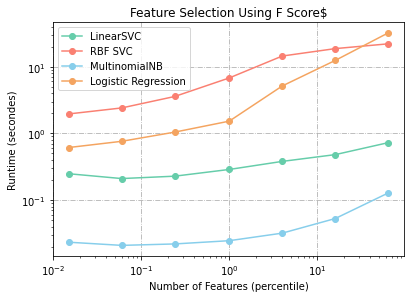

In [174]:
# plot runtime with x2
# Data
df=pd.DataFrame({'x_values': per_range, 'y1_values': f_t_linearsvc, 'y2_values': f_t_svc, 'y3_values': f_t_MNB, 'y4_values': f_t_LR})
 
# multiple line plots
plt.figure(figsize=(fig_width+0.3,fig_height+0.3))
plt.plot( 'x_values', 'y1_values', data=df, marker='.', markerfacecolor='mediumaquamarine', markersize=12, color='mediumaquamarine', label="LinearSVC")
plt.plot( 'x_values', 'y2_values', data=df, marker='.', markerfacecolor='salmon', markersize=12, color='salmon', label="RBF SVC")
plt.plot( 'x_values', 'y3_values', data=df, marker='.', markerfacecolor='skyblue', markersize=12, color='skyblue', label="MultinomialNB")
plt.plot( 'x_values', 'y4_values', data=df, marker='.', markerfacecolor='sandybrown', markersize=12, color='sandybrown', label="Logistic Regression")
plt.xscale('log')
plt.yscale('log')
plt.grid(linestyle='-.')
plt.legend()
plt.title('Feature Selection Using F Score$')
plt.xlabel('Number of Features (percentile)')
plt.ylabel('Runtime (secondes)')
plt.savefig('t_fscore.png')
plt.show()

## Ignore for now

### 13.4.1 selectfrommodel L1 norm

In [ ]:
estimator = LinearSVC(C=10, penalty="l1",dual=False)
select = SelectFromModel(estimator,max_features=5000)
vectors_train_Lemma_SFML1 = select.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
vectors_test_Lemma_SFML1 = select.transform(vectors_test_stop_tfidf_Lemma)
print(vectors_train_Lemma_SFML1.shape)

(1999, 2091)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
estimator = LinearSVC(C=10, penalty="l1",dual=False)
select = SelectFromModel(estimator,max_features=5000)
vectors_train_stem_SFML1 = select.fit_transform(vectors_train_stop_tfidf_stem, y_train_num)
vectors_test_stem_SFML1 = select.transform(vectors_test_stop_tfidf_stem)
print(vectors_train_stem_SFML1.shape)

(1999, 2064)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 13.4.2 selectfrommodel tree

In [ ]:
clf = ExtraTreesClassifier()
clf = clf.fit(vectors_train_stop_tfidf_Lemma, y_train_num)
model = SelectFromModel(clf, prefit=True)
vectors_train_Lemma_SFMtree = model.transform(vectors_train_stop_tfidf_Lemma)
vectors_train_Lemma_SFMtree.shape

(1999, 9466)

In [ ]:
clf = ExtraTreesClassifier()
clf = clf.fit(vectors_train_stop_tfidf_stem, y_train_num)
model = SelectFromModel(clf, prefit=True)
vectors_train_stem_SFMtree = model.transform(vectors_train_stop_tfidf_stem)
vectors_train_stem_SFMtree.shape

(1999, 9776)

###Recursive feature elimination

In [ ]:
estimator = LinearSVC()
select = RFECV(estimator, step=700,scoring='accuracy', n_jobs=-1)
vectors_train_Lemma_RFESVC = select.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
vectors_test_Lemma_RFESVC = select.transform(vectors_test_stop_tfidf_Lemma)
print(vectors_train_Lemma_RFESVC.shape)

(1999, 18614)


In [ ]:
model = LinearSVC()
# model.fit(vectors_train_Lemma_RFESVC, y_num)
cross_val_score(model, vectors_train_Lemma_RFESVC, y_train_num).mean()

0.9384661654135338

In [ ]:
estimator = LinearSVC()
select = RFECV(estimator, step=85,scoring='accuracy')
vectors_train_stem_RFESVC = select.fit_transform(vectors_train_stop_tfidf_stem, y_train_num)
vectors_test_stem_RFESVC = select.transform(vectors_test_stop_tfidf_stem)
print(vectors_train_stem_RFESVC.shape)

In [ ]:
estimator = LogisticRegression()
select = RFECV(estimator, step=98,scoring='accuracy')
vectors_train_Lemma_RFELR = select.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
vectors_test_Lemma_RFELR = select.transform(vectors_test_stop_tfidf_Lemma)
print(vectors_train_Lemma_RFELR.shape)

In [ ]:
estimator = LogisticRegression()
select = RFECV(estimator, step=85,scoring='accuracy')
vectors_train_stem_RFELR = select.fit_transform(vectors_train_stop_tfidf_stem, y_train_num)
vectors_test_stem_RFELR = select.transform(vectors_test_stop_tfidf_stem)
print(vectors_train_stem_RFELR.shape)

In [ ]:
estimator = MultinomialNB()
select = RFECV(estimator, step=98,scoring='accuracy')
vectors_train_Lemma_RFEMNB = select.fit_transform(vectors_train_stop_tfidf_Lemma, y_train_num)
vectors_test_Lemma_RFEMNB = select.transform(vectors_test_stop_tfidf_Lemma)
print(vectors_train_Lemma_RFEMNB.shape)

In [ ]:
estimator = MultinomialNB()
select = RFECV(estimator, step=85,scoring='accuracy')
vectors_train_stem_RFEMNB = select.fit_transform(vectors_train_stop_tfidf_stem, y_train_num)
vectors_test_stem_RFEMNB = select.transform(vectors_test_stop_tfidf_stem)
print(vectors_train_stem_RFEMNB.shape)

### Experiment on sklearn models (with NGRAM)

### Find the best set of features
We have 16 sets in total


The best are 

vectors_train_Lemma_X2

vectors_train_Lemma_F

vectors_train_Lemma_SFML1

In [ ]:
model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_X2, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_X2, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_mutual, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_mutual, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_F, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_F, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_FPR, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_FPR, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_FDR, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_FDR, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_FWE, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_FWE, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_SFML1, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_SFML1, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_Lemma_SFMtree, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stem_SFMtree, y_train_num, cv=10)
print(scores.mean())

0.9459798994974875
0.9449748743718593
0.934464824120603
0.930462311557789
0.9469748743718593
0.9449773869346734
0.9384698492462311
0.9424723618090451
0.9214572864321608
0.927467336683417
0.8869422110552764
0.8869422110552764
0.9484748743718594
0.9464723618090451
0.938464824120603
0.9339623115577889


In [ ]:
model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_X2, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_X2, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_mutual, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_mutual, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_F, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_F, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_FPR, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_FPR, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_FDR, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_FDR, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_FWE, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_FWE, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_SFML1, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_SFML1, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_Lemma_SFMtree, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stem_SFMtree, y_train_num, cv=10)
print(scores.mean())

0.9364798994974877
0.9354798994974877
0.9289748743718593
0.9289723618090452
0.9374773869346734
0.9309748743718593
0.9329723618090451
0.927467336683417
0.9079522613065327
0.9109572864321608
0.8764422110552765
0.8764422110552765
0.9274698492462312
0.9264698492462312
0.9304723618090451
0.926469849246231


In [ ]:
model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_X2, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_X2, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_mutual, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_mutual, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_F, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_F, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_FPR, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_FPR, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_FDR, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_FDR, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_FWE, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_FWE, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_SFML1, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_SFML1, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_Lemma_SFMtree, y_train_num, cv=10)
print(scores.mean())

model = MultinomialNB()
scores = cross_val_score(model, vectors_train_stem_SFMtree, y_train_num, cv=10)
print(scores.mean())

0.9179673366834171
0.9209648241206029
0.9164673366834171
0.9144648241206029
0.9329723618090451
0.928967336683417
0.9159698492462311
0.9214623115577888
0.8879497487437185
0.8814522613065326
0.839929648241206
0.839929648241206
0.926469849246231
0.9324673366834171
0.9229698492462312
0.9234648241206029


### Grid search
The best features:

vectors_train_Lemma_X2

vectors_train_Lemma_F

vectors_train_Lemma_SFML1

#### vectors_train_Lemma_X2
Best models: LinearSVM, MultiNB, BernouliNB

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LinearSVC()
parameters = {
    'C': (0.01, 0.1, 1, 10, 100, 1000)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_X2, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9459798994974875
C: 1


In [ ]:
model = MultinomialNB()
parameters = {
    'alpha': (1e-10, 1e-5, 0.1, 0.5, 1, 2), 
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_X2, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9554849246231155
alpha: 1e-10


In [ ]:
model = BernoulliNB()
parameters = {
    'alpha': (1e-10, 1e-5, 0.1, 0.5, 1, 2)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_X2, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9469773869346734
alpha: 1e-10


#### vectors_train_Lemma_F
Best model: MultiNB, LinearSVM, BernouliNB

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LinearSVC()
parameters = {
    'C': (0.01, 0.1, 1, 10, 100, 1000)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_F, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9469748743718593
C: 1


In [ ]:
model = MultinomialNB()
parameters = {
    'alpha': (1e-10, 1e-5, 0.1, 0.5, 1, 2), 
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_F, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9639874371859296
alpha: 1e-05


In [ ]:
model = BernoulliNB()
parameters = {
    'alpha': (1e-10, 1e-5, 0.1, 0.5, 1, 2)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_F, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9594824120603015
alpha: 1e-10


#### vectors_train_Lemma_SFML1
Best model: MultiNB, LinearSVM, BernouliNB

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LinearSVC()
parameters = {
    'C': (0.01, 0.1, 1, 10, 100, 1000)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_SFML1, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9594874371859297
C: 10


In [ ]:
model = MultinomialNB()
parameters = {
    'alpha': (1e-10, 1e-5, 0.1, 0.5, 1, 2), 
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_SFML1, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9439773869346734
alpha: 0.1


In [ ]:
model = BernoulliNB()
parameters = {
    'alpha': (1e-10, 1e-5, 0.1, 0.5, 1, 2)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_Lemma_SFML1, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9519874371859297
alpha: 0.1


### Best model: LinearSVM on vectors_train_Lemma_SFML1

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = LinearSVC(C=10)
model.fit(vectors_train_Lemma_SFML1, y_train_num)
cross_val_score(model, vectors_train_Lemma_SFML1, y_train_num, cv=10)

array([0.94      , 0.97      , 0.96      , 0.955     , 0.945     ,
       0.96      , 0.985     , 0.955     , 0.95      , 0.97487437])

In [ ]:
model = LinearSVC(C=10)
model.fit(vectors_train_Lemma_SFML1, y_train_num)
y_pred = model.predict(vectors_test_Lemma_SFML1)
y_pred = le.inverse_transform(y_pred)

#### Write results to CSV

In [ ]:
result = pd.DataFrame({'id': test.id, 'subreddit': y_pred})
result.to_csv("result.csv", index=False)

In [ ]:
pred_csv = pd.read_csv('result.csv',engine='python')
pred_csv.head()

,id,subreddit
0,0,science
1,1,science
2,2,anime
3,3,science
4,4,science


### Second Best model: MultiNB on vectors_train_Lemma_F

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = MultinomialNB(alpha=1e-5)
# model.fit(vectors_train_Lemma_F, y_train_num)
cross_val_score(model, vectors_train_Lemma_F, y_train_num, cv=10)

array([0.96      , 0.985     , 0.95      , 0.975     , 0.94      ,
       0.965     , 0.98      , 0.955     , 0.955     , 0.97487437])

In [ ]:
model = MultinomialNB(alpha=1e-5)
model.fit(vectors_train_Lemma_F, y_train_num)
y_pred = model.predict(vectors_test_Lemma_F)
y_pred = le.inverse_transform(y_pred)

#### Write results to CSV

In [ ]:
result = pd.DataFrame({'id': test.id, 'subreddit': y_pred})
result.to_csv("result.csv", index=False)

In [ ]:
pred_csv = pd.read_csv('result.csv',engine='python')
pred_csv.head()

,id,subreddit
0,0,science
1,1,science
2,2,laptop
3,3,science
4,4,science
